In [28]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [29]:
# Load data from CSV file
data = pd.read_csv("data.csv")

In [30]:
# Split data into independent (X) and dependent (y) variables
X = data.drop(['price'], axis=1)
y = data['price'].astype(int)

In [31]:
# create a list of categorical columns
categorical_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_cols.append(col)

# instantiate the one-hot encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# transform the categorical columns using the one-hot encoder
onehot_encoded = onehot_encoder.fit_transform(data[categorical_cols])

# convert the sparse matrix to a pandas DataFrame
X_encoded = pd.DataFrame.sparse.from_spmatrix(onehot_encoded)

# set the column names of the encoded DataFrame
X_encoded.columns = onehot_encoder.get_feature_names_out(categorical_cols)

# drop the original categorical columns from the original DataFrame
X = data.drop(categorical_cols, axis=1)

# concatenate the encoded categorical columns with the remaining columns
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [33]:
# Create linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
# Use the model to make predictions on the test set
y_pred = regressor.predict(X_test)

In [35]:
y_test.head()

159     7788
14     24565
96      7499
48     35550
67     25552
Name: price, dtype: int32

In [36]:
error_scroe = print("R-squared score:", mean_squared_error(y_test, y_pred))

R-squared score: 0.0034100272892849262


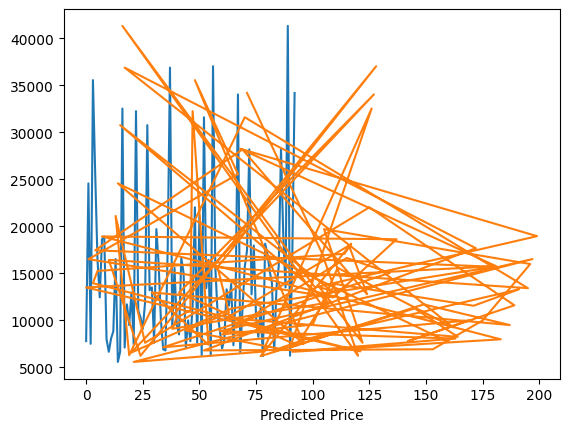

In [37]:
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.show()